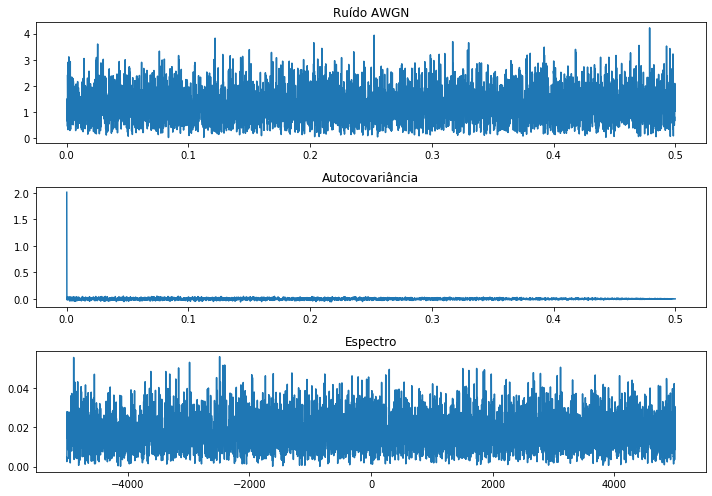

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift


def autocovariance(x):
    x_centered = x - np.mean(x)
    return np.correlate(x_centered, x_centered, mode='full')[len(x) - 1:] / len(x)

Ts = 0.0001
Fs = 1/Ts
t = np.arange(0, 0.5, Ts)                  # Eixo do tempo
N = len(t)                                 # Tamanho de x

nr = np.random.standard_normal(N)          # Amostras da parte real do ruído 
ni = np.random.standard_normal(N)          # Amostras da parte imaginária do ruído 
n = nr + 1j*ni                             # Ruído complexo

M = fftshift(fft(n, N)/N)                  # Sinal N(f) 
freq = np.arange(-Fs/2, Fs/2, Fs/N)        # Eixo da frequência

# Gráficos: como se trata de sinal complexo, vamos mostrar sua magnitude
plt.figure(figsize=[10,7])

plt.subplot(311)
plt.title("Ruído AWGN")
plt.plot(t,np.abs(n))

plt.subplot(312)
plt.title("Autocovariância")
plt.plot(t,autocovariance(n))

plt.subplot(313)
plt.title("Espectro")
plt.plot(freq,np.abs(M))

plt.tight_layout()
plt.show()

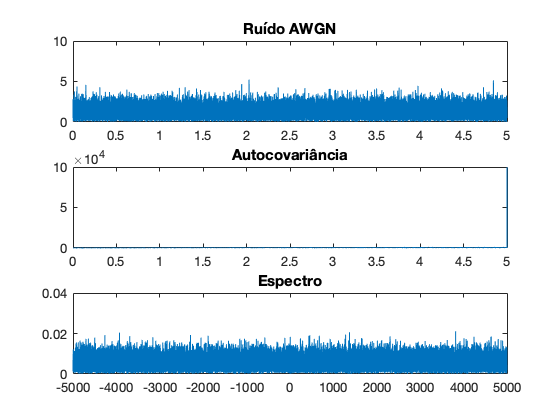

In [23]:
% Parâmetros
SNR_dB = 5;                            % Determina o valor da SNR em dB
Ts = 0.0001;
Fs = 1/Ts;

t = 0:Ts:5;                            % Eixo do tempo

% Geração manual das amostras de ruído 
len = length(t);                       % Calcula o comprimento de x
n = randn(1,len)+j*randn(1,len);

autovar = xcov(n);
autovar = autovar(1:len);

N = fftshift(fft(n, len)/len);         % Sinal N(f) 
freq = -Fs/2:Fs/len:Fs/2-Fs/len;       % Eixo da frequência

% Gráficos
fig=figure;

subplot(3, 1, 1);
plot(t, abs(n));
title('Ruído AWGN')

subplot(3, 1, 2);
plot(t, abs(autovar));
title('Autocovariância');

subplot(3, 1, 3);
plot(freq, abs(N));
title('Espectro');

playblocking(audioplayer(n, 44100));

A partir dos gráficos gerados, podemos observar o que era esperado: tanto no tempo quanto na frequência, há um comportamento aleatório e sem padrão facilmente perceptível (distribuição normal).

Além disso, não há autocovariância, i.e., correlação entre diferentes amostras. Novamente, esse era o comportamento esperado porque as amostras de um ruído gaussiano são independentes.

Podemos reconhecer o som gerado ao reproduzir o sinal e associá-lo a ruído. Remete-se a quando usava televisão e colocava em algum canal aonde não havia recepção e, portanto, reproduzia-se o ruído térmico gaussiano.

In [33]:
import numpy as np
from scipy.io import loadmat

def snr_db(x):
    return 10*np.log10(x)

signal = loadmat('material/sinal_real.mat')
y = signal["y"].flatten()
Am = signal["Am"].flatten()[0]
fm = signal["fm"].flatten()[0]

signal_power = Am/2
signal_with_noise_power = np.sum(np.abs(y)**2)/len(y)
snr = signal_power/(signal_with_noise_power-signal_power)

print("SNR para {}cos({}pi*t): {:1.2f}dB".format(Am, 2*fm, snr_db(snr)))

SNR para 2cos(20pi*t): -0.21dB


In [32]:
import numpy as np
from scipy.io import loadmat

def snr_db(x):
    return 10*np.log10(x)

signal = loadmat('material/sinal_complexo.mat')
y = signal["y"].flatten()
Ar = signal["Ar"].flatten()[0]
Ai = signal["Ai"].flatten()[0]
fm = signal["fm"].flatten()[0]

signal_power = Ar/2 + Ai/2
signal_with_noise_power = np.sum(np.abs(y)**2)/len(y)
snr = signal_power/(signal_with_noise_power-signal_power)

print("SNR para {}cos({}pi*t)+j{}cos({}pi*t): {:1.2f}dB".format(Ar, 2*fm, Ai, 2*fm, snr_db(snr)))

SNR para 2cos(20pi*t)+j0.2cos(20pi*t): -0.18dB


In [13]:
signal = load('material/sinal_real.mat');
y = signal.y;
Am = signal.Am;
fm = signal.fm;

signal_power = Am/2;
signal_with_noise_power = sum(abs(y).^2)/length(y);
snr = 10*log10(signal_power/(signal_with_noise_power-signal_power));

disp(['SNR para ' num2str(Am) 'cos(' num2str(2*fm) 'pi*t): ' num2str(snr) 'dB'])

SNR para 2cos(20pi*t): -0.2137dB


In [14]:
signal = load('material/sinal_complexo.mat');
y = signal.y;
Ar = signal.Ar;
Ai = signal.Ai;
fm = signal.fm;

signal_power = Ar/2 + Ai/2;
signal_with_noise_power = sum(abs(y).^2)/length(y);
snr = 10*log10(signal_power/(signal_with_noise_power-signal_power));

disp(['SNR para ' num2str(Ar) 'cos(' num2str(2*fm) 'pi*t) + j' num2str(Ai) 'cos(' num2str(2*fm) 'pi*t): ' num2str(snr) 'dB'])

SNR para 2cos(20pi*t) + j0.2cos(20pi*t): -0.17531dB


Podemos observar que é possível realizar essa tarefa de forma análoga tanto em Python quanto em Matlab. Não obstante, o código utilizado em ambas abordagens é bastante similar.

Conhecendo o sinal original, passa a ser trivial calcularmos a SNR. Nesse caso, é-se ainda mais simples por termos uma forma analítica de determinarmos a potência do sinal. Vale salientar que, embora tenhamos a frequência de amostragem, não temos a duração do sinal original.